In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2356.097777777778
RMSE =  5168.398969377912


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  375.30444444444447
RMSE =  834.1915007958304


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f1 = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
    ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  11018.404255319148
RMSE =  13166.836235284789
-- World performances for deaths --
MAPE =  1740.9574468085107
RMSE =  2144.706481926378


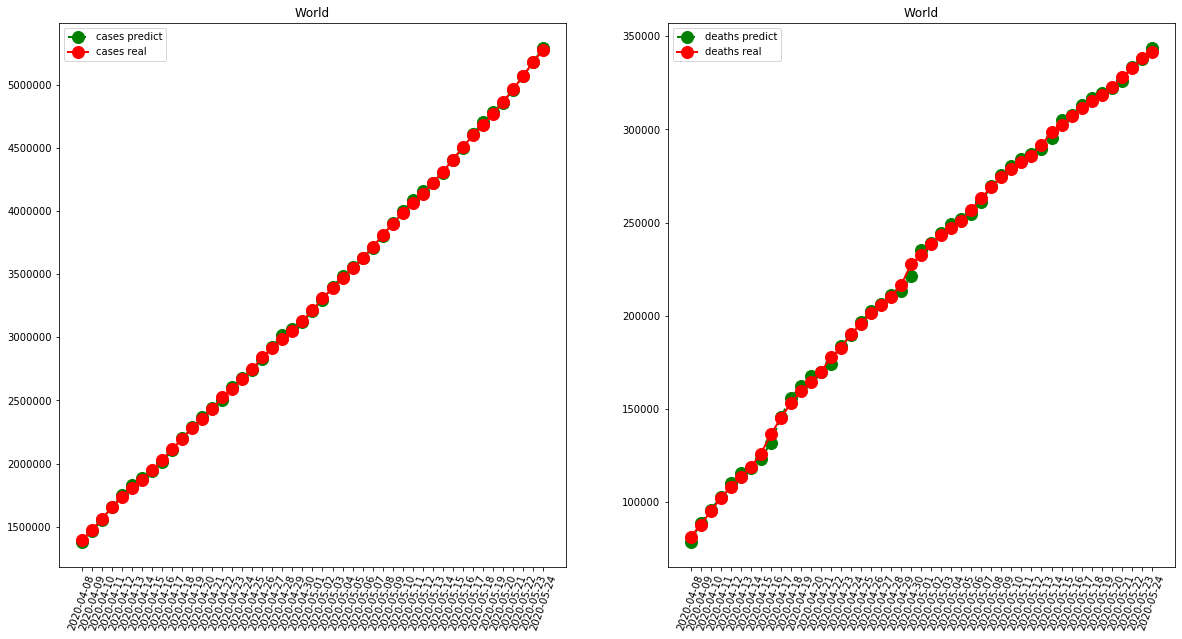

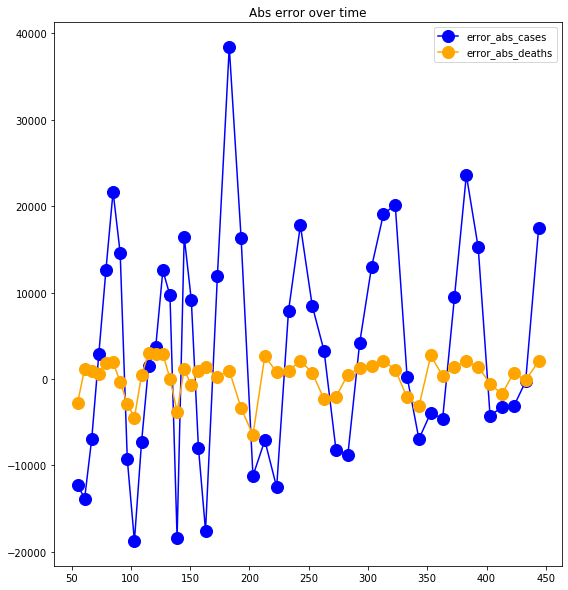

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  1170.438596491228
RMSE =  1806.701477297834
-- France performances for deaths --
MAPE =  289.0
RMSE =  442.70319945423654


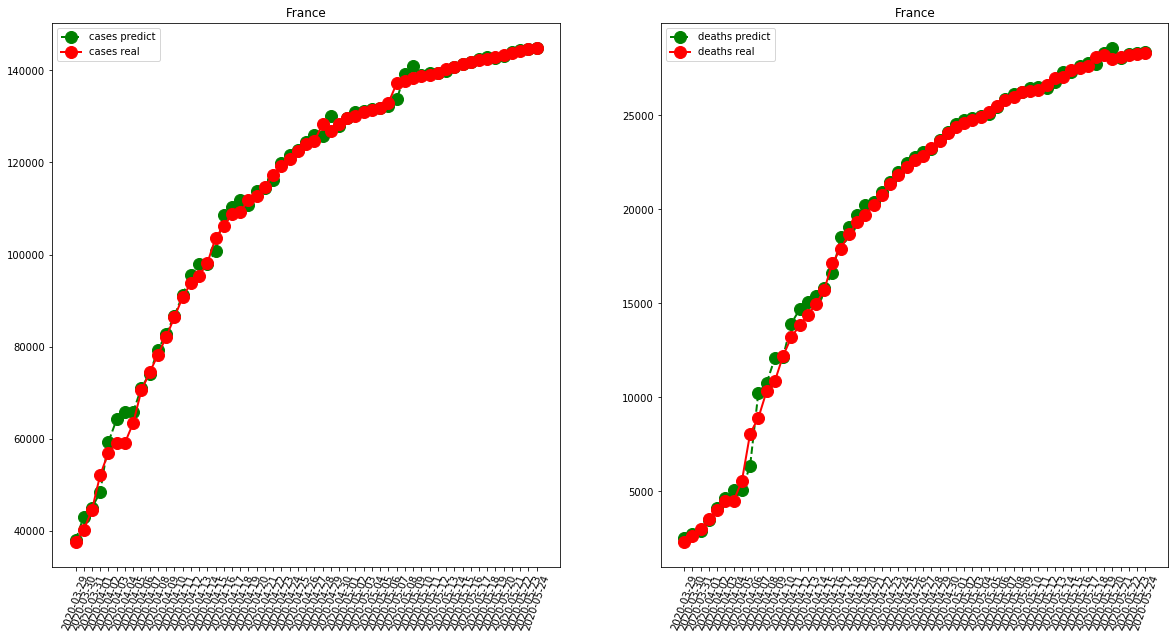

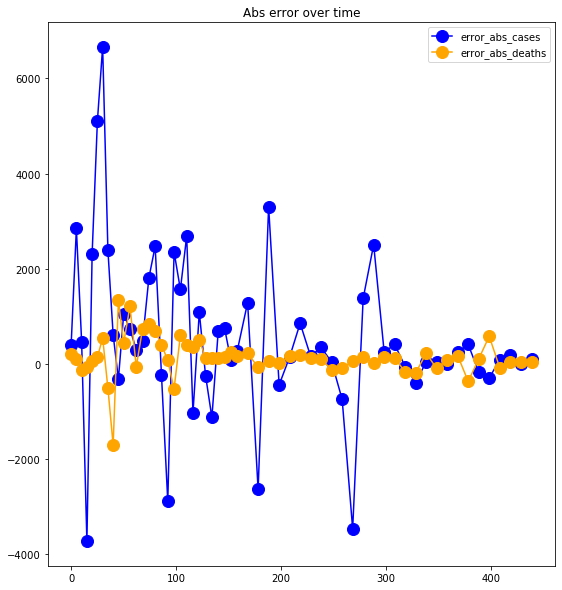

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  513.8947368421053
RMSE =  692.0689297380513
-- Italy performances for deaths --
MAPE =  148.56140350877192
RMSE =  390.4546158230734


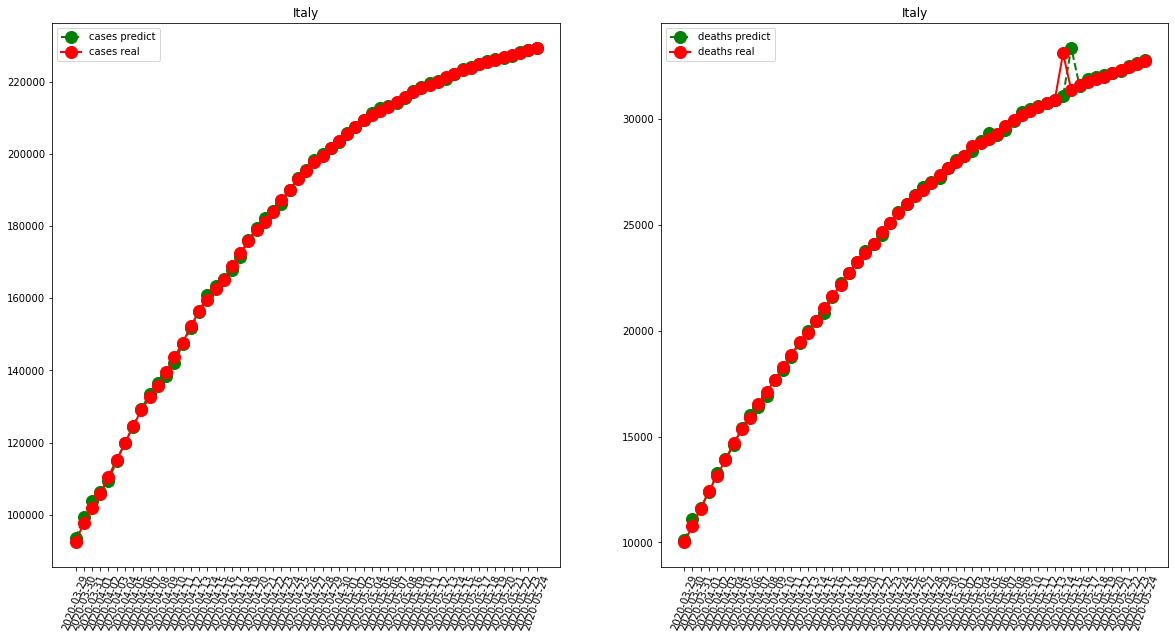

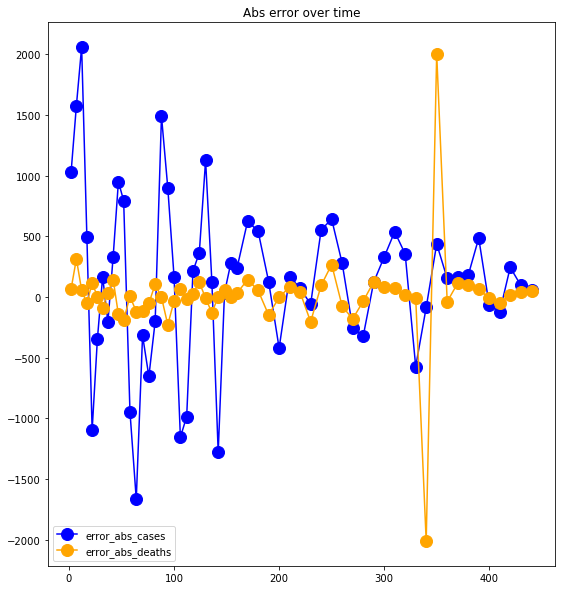

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1299.701754385965
RMSE =  2692.6686788454103
-- Spain performances for deaths --
MAPE =  124.3157894736842
RMSE =  175.85969287743958


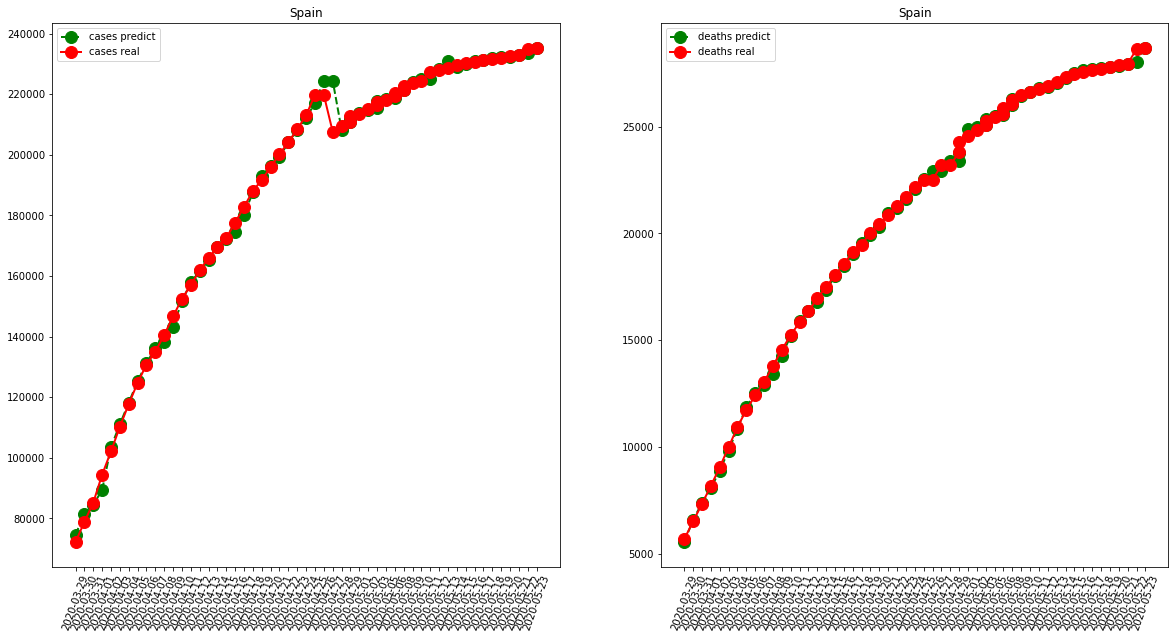

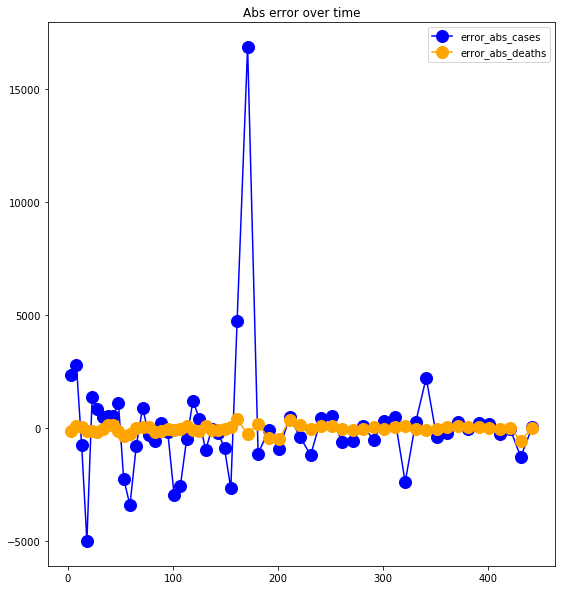

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  5254.9473684210525
RMSE =  7423.03534643248
-- United States performances for deaths --
MAPE =  627.3157894736842
RMSE =  923.4284611203066


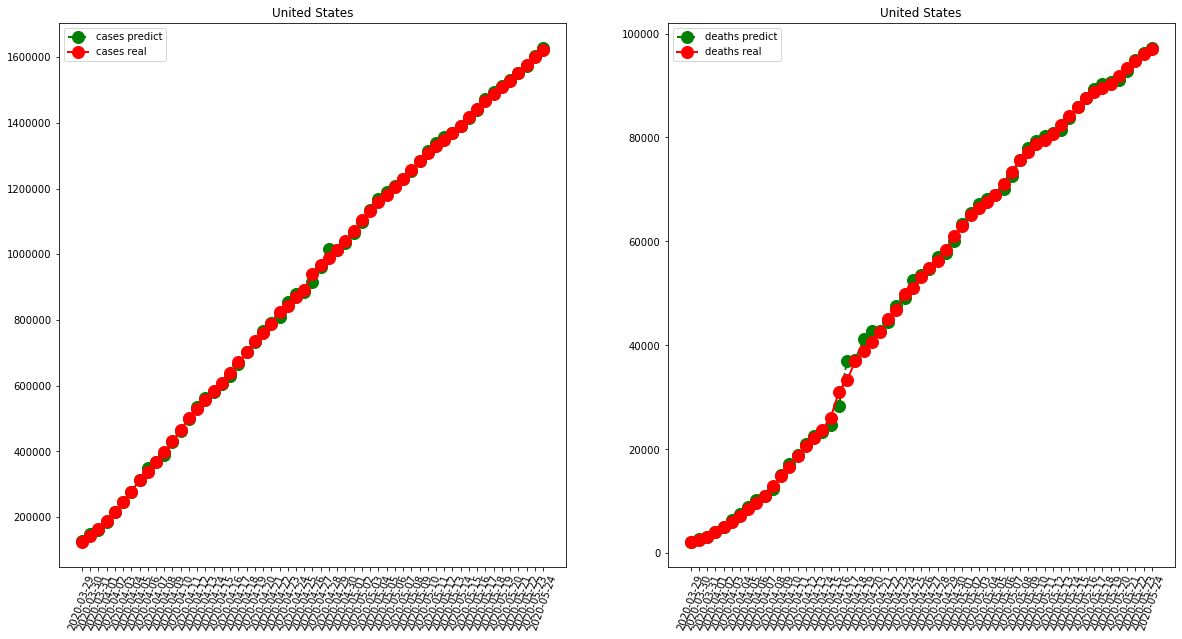

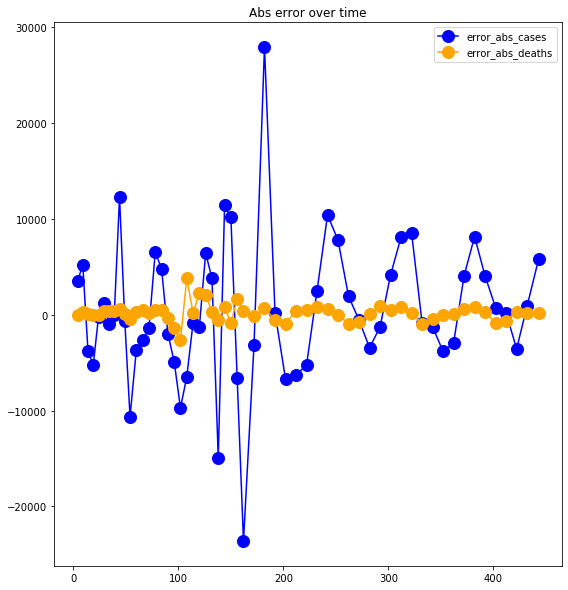

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  122.0
RMSE =  150.56222121149898
-- China performances for deaths --
MAPE =  57.85964912280702
RMSE =  207.57809775278957


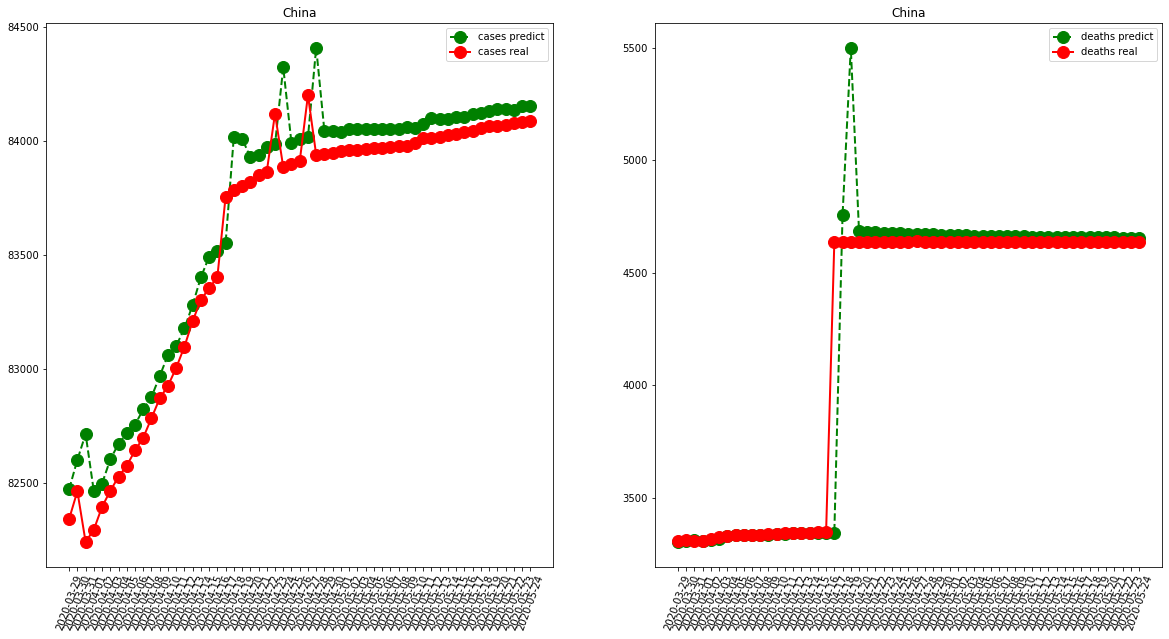

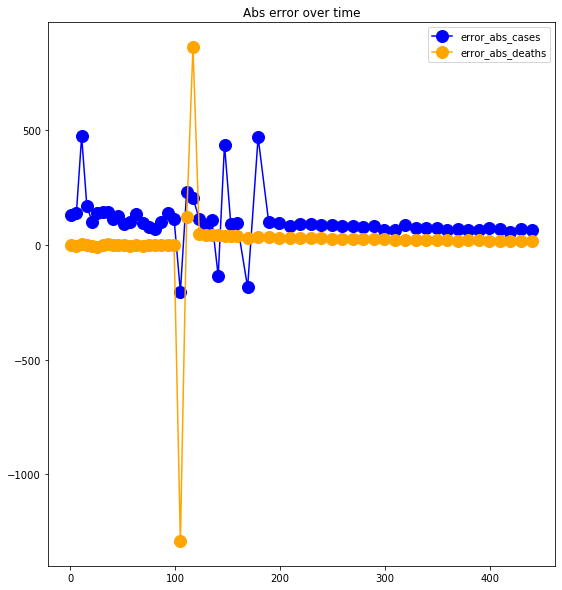

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  1125.0689655172414
RMSE =  1498.8627988095416
-- United Kingdom performances for deaths --
MAPE =  412.7586206896552
RMSE =  890.0259972956234


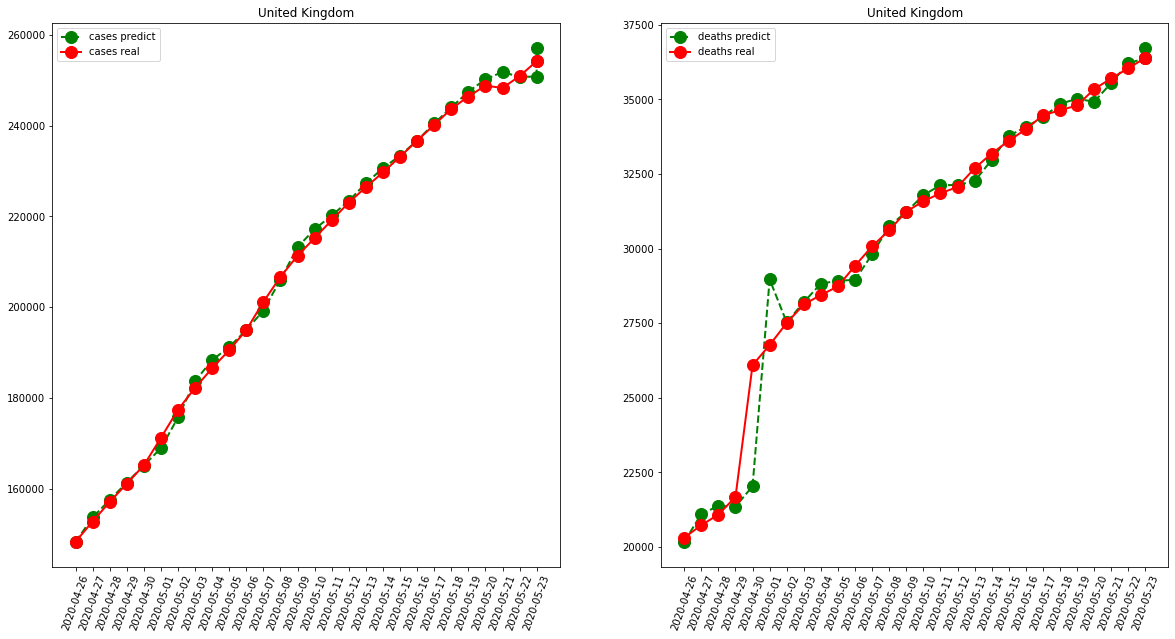

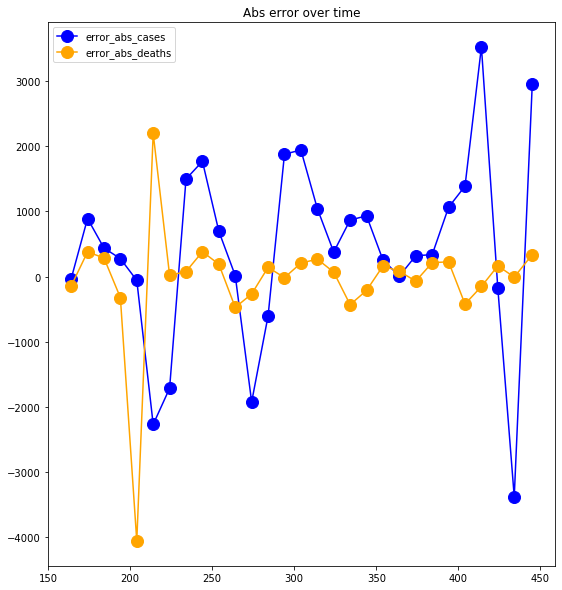

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  467.9310344827586
RMSE =  609.5691525365584
-- Germany performances for deaths --
MAPE =  55.96551724137931
RMSE =  78.1318514237091


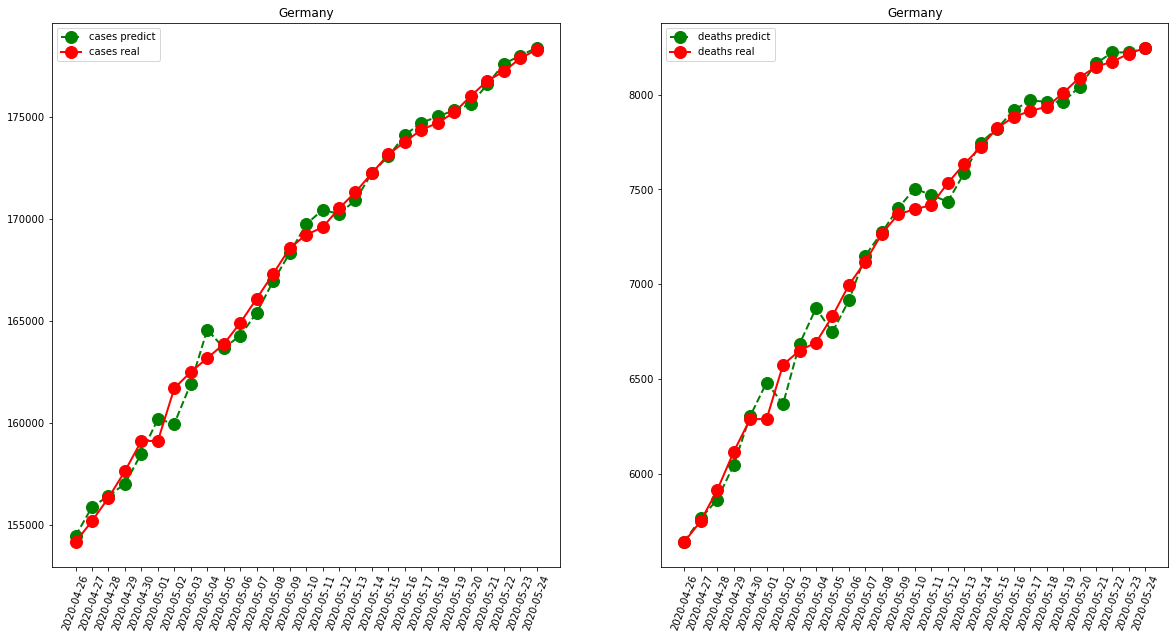

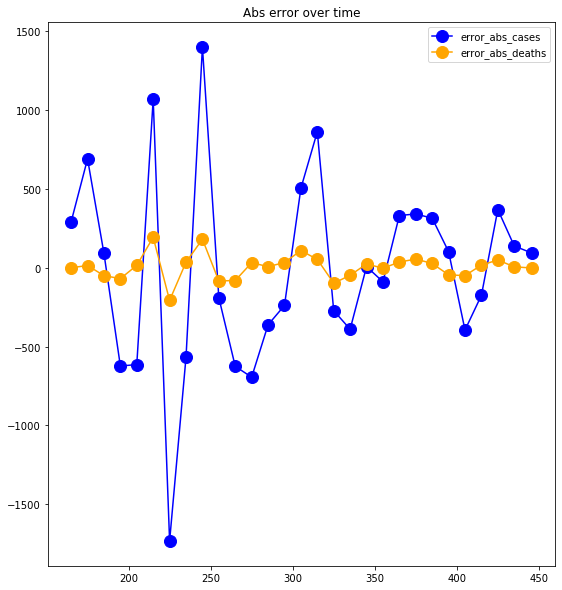

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  171.24137931034483
RMSE =  226.11196494138733
-- Iran performances for deaths --
MAPE =  13.413793103448276
RMSE =  16.64331697709324


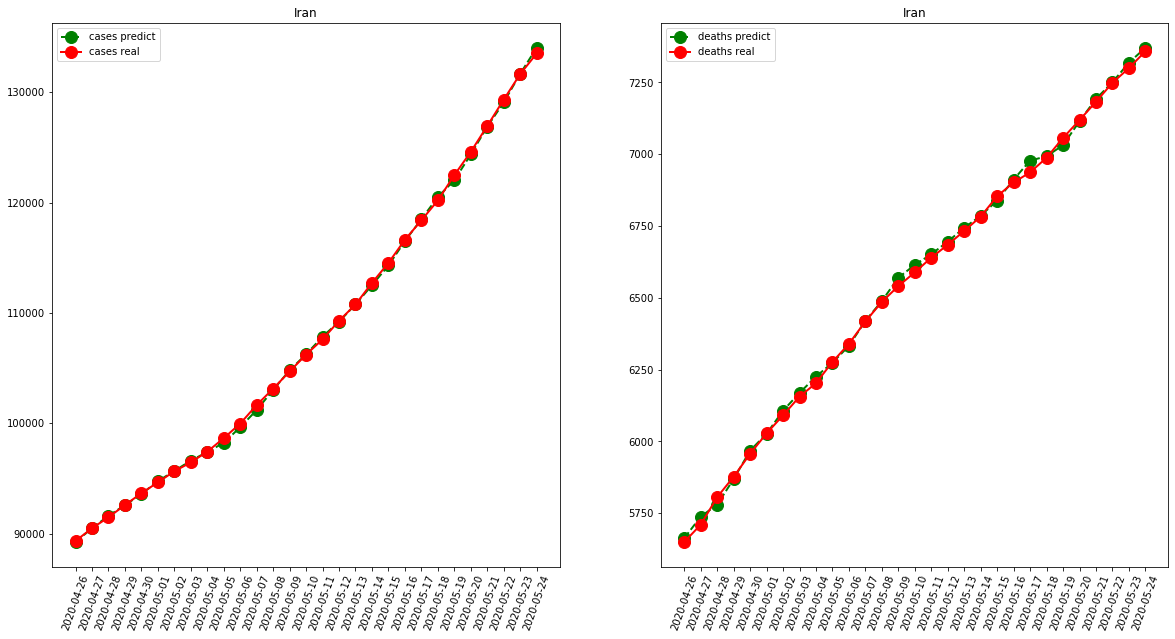

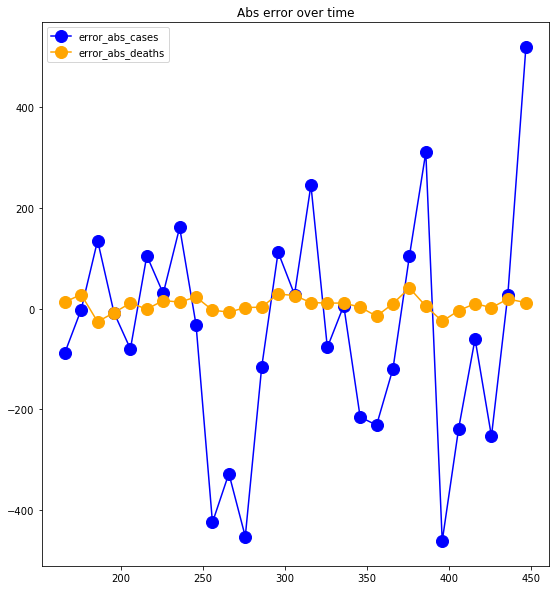

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  325.6551724137931
RMSE =  438.4102943669281
-- Turkey performances for deaths --
MAPE =  55.58620689655172
RMSE =  188.0590516208984


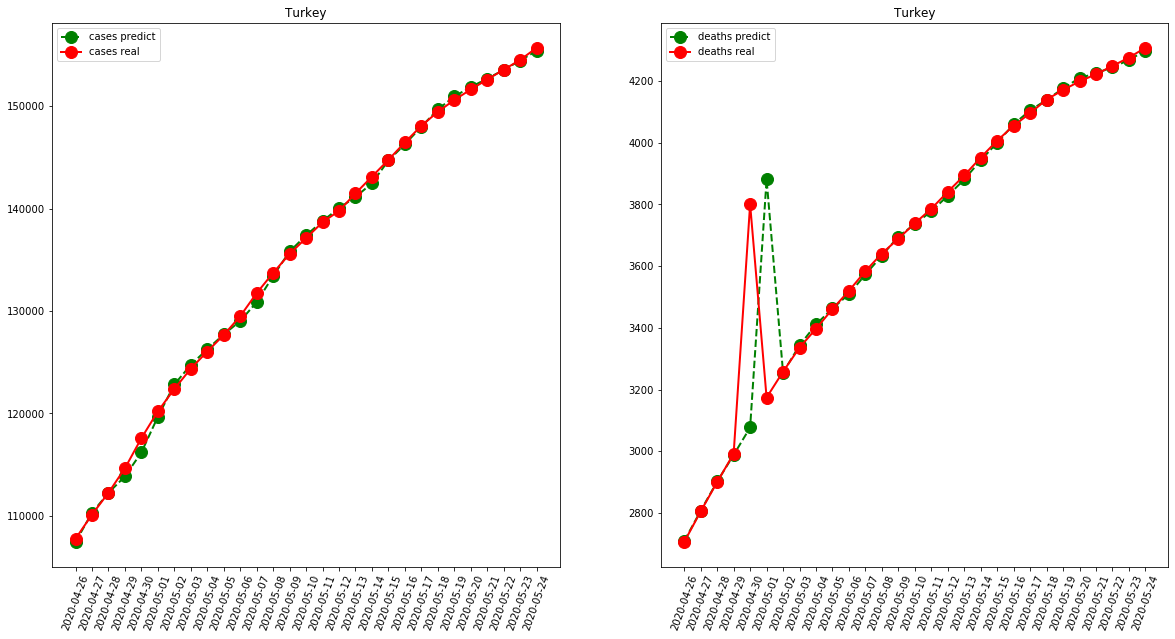

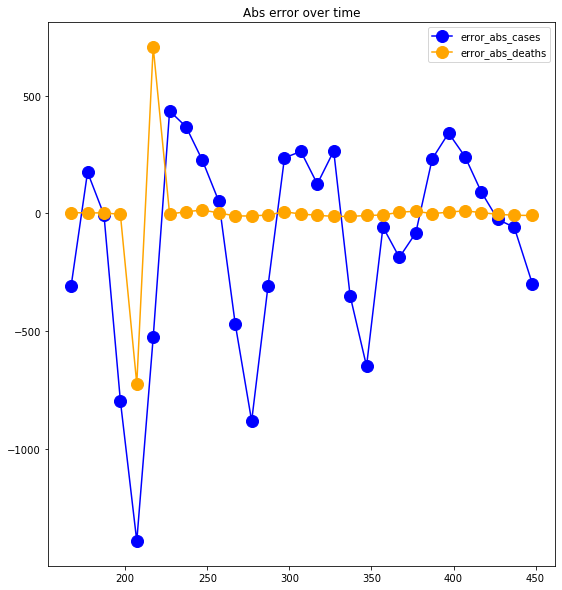

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  2598.0
RMSE =  3215.6848415228756
-- Brazil performances for deaths --
MAPE =  193.0
RMSE =  208.54256160314134


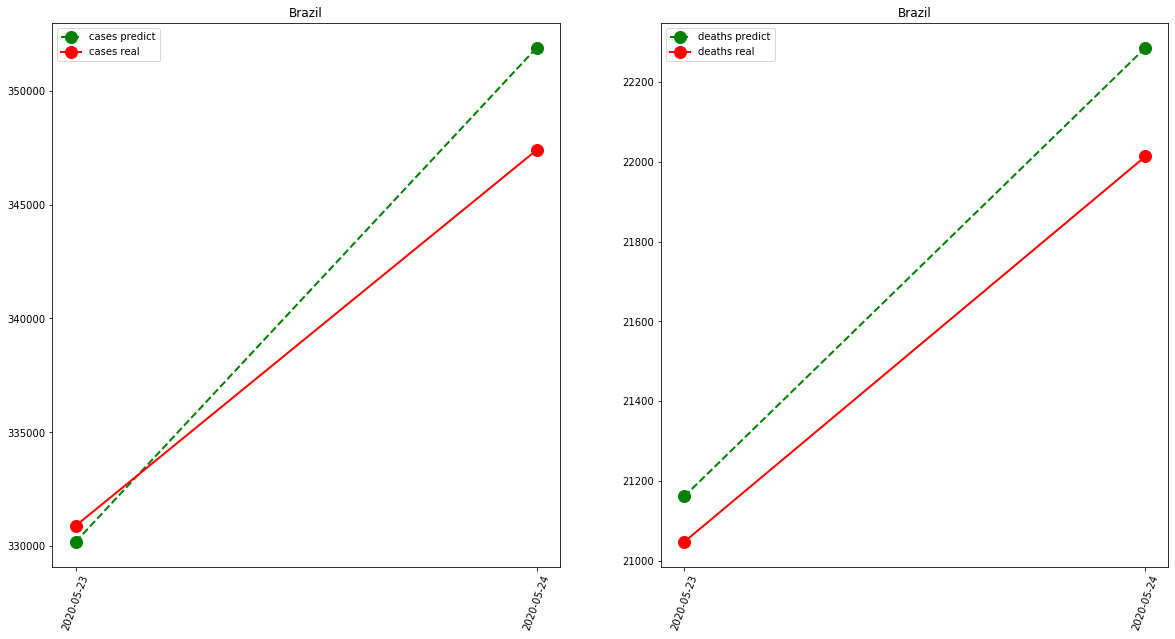

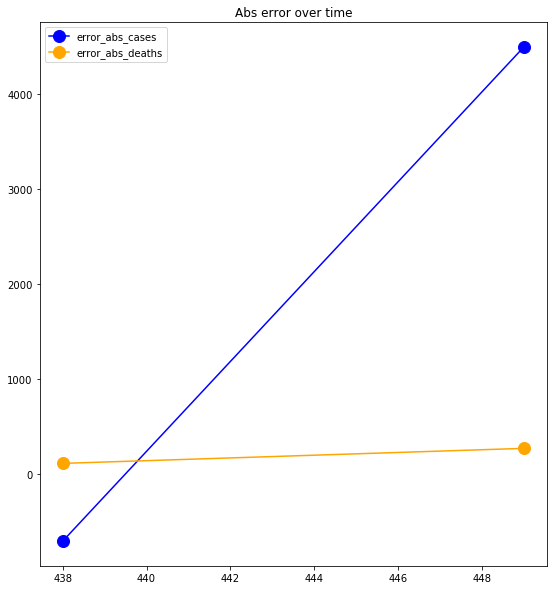

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)